# EDA World Happiness Dataset - Mikołaj Gałkowski

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('dane/2015.csv')

### Dimensions of the dataset

In [2]:
data.shape

(158, 12)

### Let's look at some first records from the dataset

In [3]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Feature names

In [4]:
list(data.columns)

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

##### Columns description:

**Country** - Name of the country

**Region** - Region the country belongs to.

**Happiness Rank** - Rank of the country based on the Happiness Score.

**Happiness Score** - Average rating of the inhabitants of a given country, describing the level of happiness, where 0 - the lowest level of happiness, 10 - the highest level of happiness

**Standard Error** - The standard error of the happiness score.

**Economy (GDP per Capita)** - The extent to which GDP contributes to the calculation of the Happiness Score.

**Family** - The extent to which Family contributes to the calculation of the Happiness Score.

**Health (Life Expectancy)** - The extent to which Life expectancy contributed to the calculation of the Happiness Score

**Freedom** - The extent to which Freedom contributed to the calculation of the Happiness Score.

**Trust (Government Corruption)** - The extent to which Perception of Corruption contributes to Happiness Score.

**Generosity** - The extent to which Generosity contributed to the calculation of the Happiness Score.

**Dystopia Residual** - The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

### Data types of the features

In [5]:
data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

### Let's look at the statistical summary of the dataset

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


### Let's check whether data contains NULL values

In [7]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

### Distribution of numeric features

In [8]:
numeric_features = list(data.select_dtypes("float64").columns)

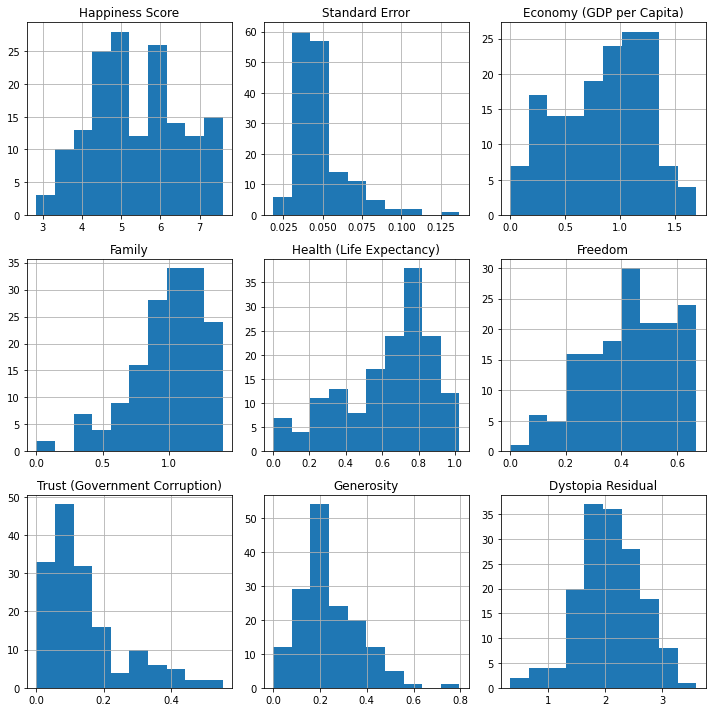

In [9]:
fig,ax = plt.subplots(3,3,figsize=(10,10))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    data[i].hist(ax=ax[row,col])
    ax[row,col].set_title(i)
    col += 1
    
fig.tight_layout()

plt.show()

As we can see happiness score mean is around 5.5. Moreover it does not exceed 8 and is not lower than 2.

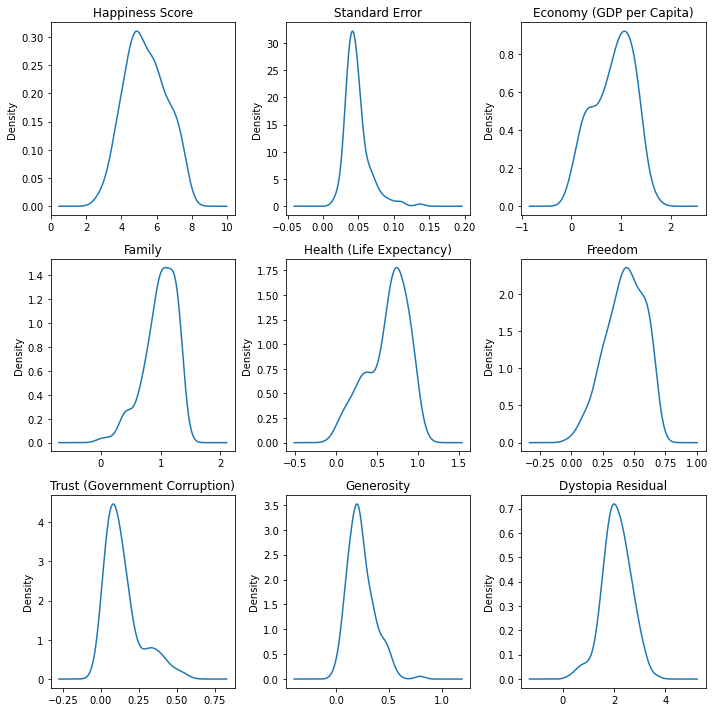

In [10]:
fig,ax = plt.subplots(3,3,figsize=(10,10))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    data[i].plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(i)
    col += 1
    
fig.tight_layout()

plt.show()

### Correlation matrix

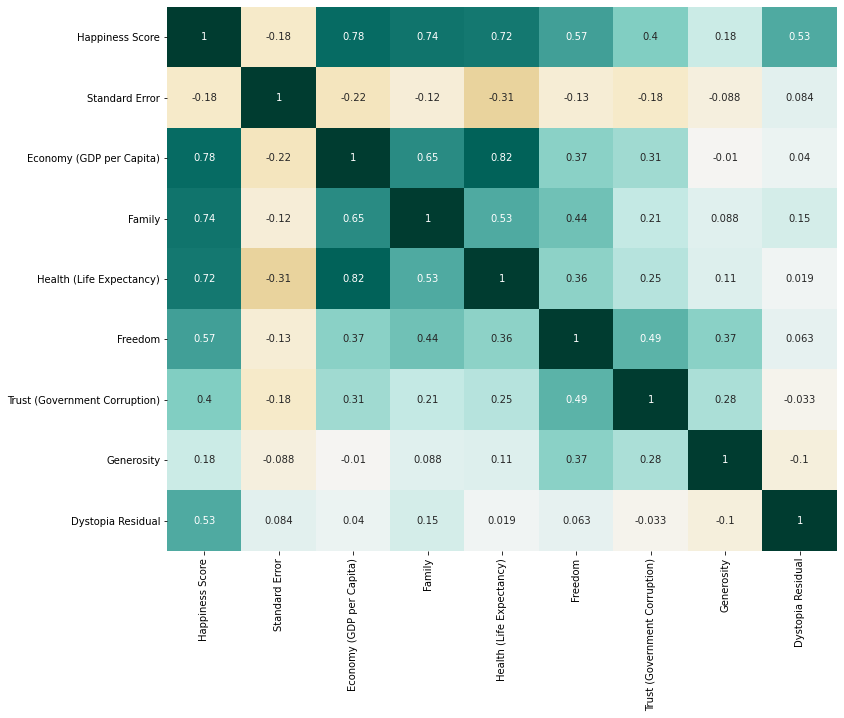

In [11]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(data[numeric_features].corr(), annot=True, vmin=-1, vmax=1, cmap="BrBG", cbar=False)
plt.show()

As we can notice happiness score is highly correlated with columns: Family, Health (Life Expectancy) and Economy (GDP per Capita).


### Let's look at the scatter plots of this correlated columns with linear regression line.

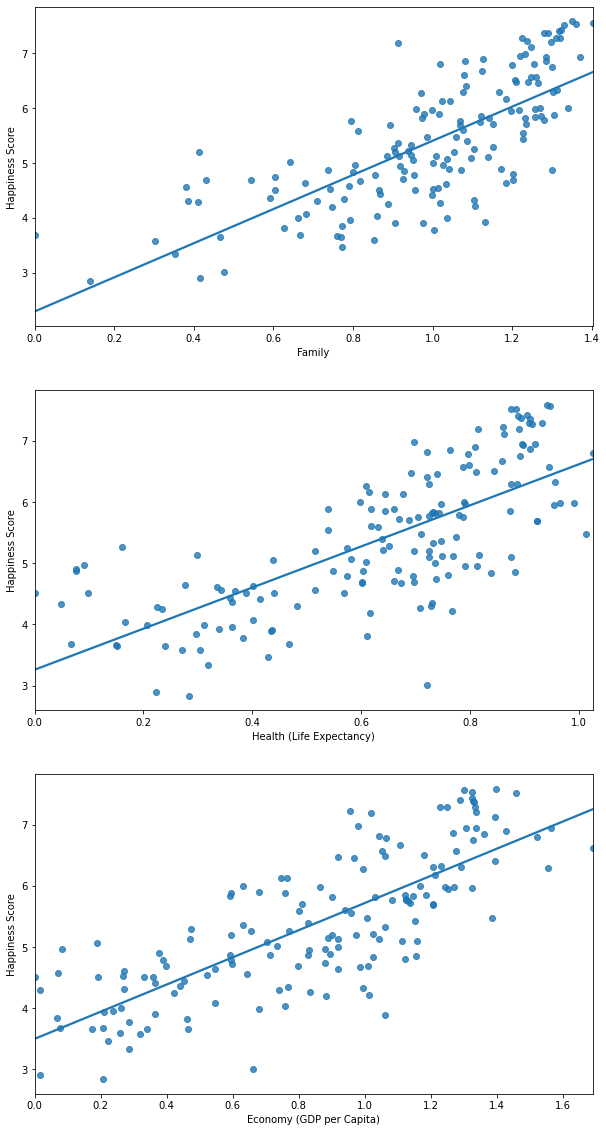

In [12]:
fig, ax = plt.subplots(3, 1, figsize = (10, 20))
row =  0
for elem in ["Family", "Health (Life Expectancy)", "Economy (GDP per Capita)"]:
    sns.regplot(x=elem,y="Happiness Score",data=data,ax=ax[row],ci=False)
    row += 1

Surveyed people from countries with high happiness score are definitely living in richer countries and are more focusing on their family and health.

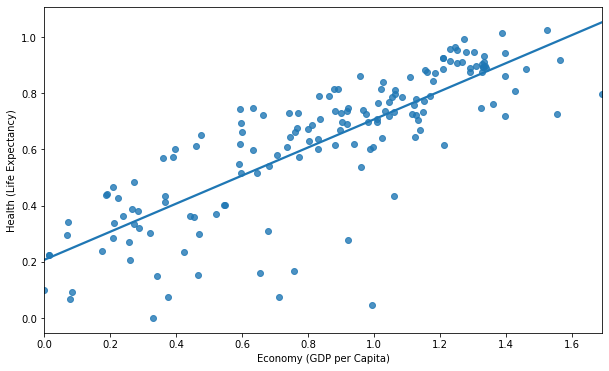

In [13]:
plt.figure(figsize=(10, 6))
sns.regplot(x="Economy (GDP per Capita)",y="Health (Life Expectancy)",data=data,ci=False)
plt.show()

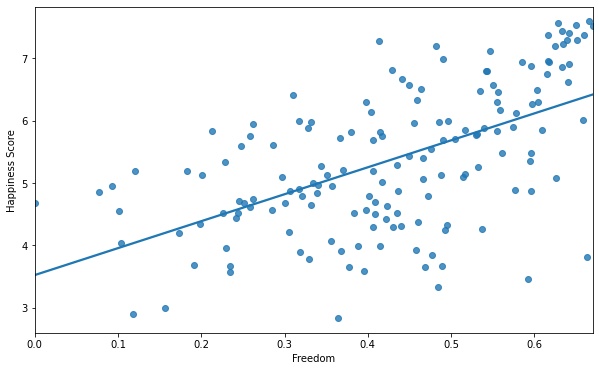

In [14]:
plt.figure(figsize=(10, 6))
sns.regplot(x="Freedom",y="Happiness Score",data=data,ci=False)
plt.show()

In [15]:
df = data.sort_values('Happiness Score', ascending=False)
df1 = df.head(10)
df2 = df.tail(10)


### Let's look at countries which has the highest happiness score.

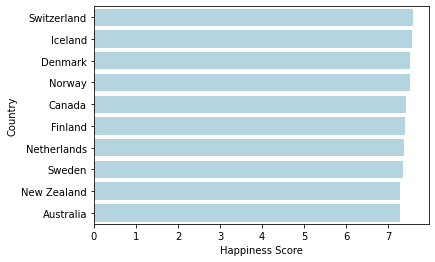

In [16]:
sns.barplot(x = df1['Happiness Score'], y = df1['Country'], color = "lightblue")
plt.show()

### Also the ones with the lowest.

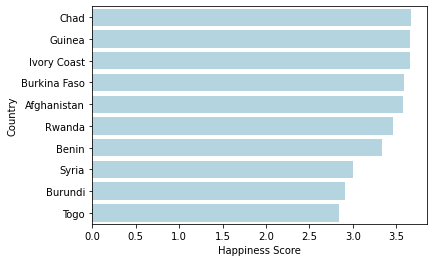

In [17]:
sns.barplot(x = df2['Happiness Score'], y = df2['Country'], color = "lightblue")
plt.show()

What's worth noticing is that countries with the highest happiness score are the rich ones. This suggests that people living in wealthier countries are more likely to be happy rather than people living in poorer countries.